In [12]:
%%manim -qm -v WARNING Sceno

UsageError: %%manim is a cell magic, but the cell body is empty. Did you mean the line magic %manim (single %)?


In [13]:
from manim import *
import numpy as np
from IPython import get_ipython

In [14]:
from manim import *
import numpy as np

def forward_kinematics(lengths: list[float], theta: list[float], ground_pos=(0, 0, 0)):
    positions = [ground_pos]
    x, y = 0, 0
    for i in range(len(lengths)):
        next_x = x + lengths[i]*np.cos(theta[i])
        next_y = y + lengths[i]*np.sin(theta[i])
        x, y = next_x, next_y
        positions.append((x, y, 0))
    return positions

def move_arm(lengths, theta, joints: list[Dot], ground_pos=(0, 0, 0)):
    positions = forward_kinematics(lengths, theta, ground_pos)
    return AnimationGroup([
        joints[i].animate.move_to(positions[i])
        for i in range(len(joints))
    ])

In [15]:
from manim import *
import numpy as np

def f(self: Scene):
    #self.wait(2)
    lengths = [2, 1.2, 0.8]
    theta = [35*DEGREES, 105*DEGREES, 160*DEGREES]
    ground_pos = DOWN*2
    positions = forward_kinematics(lengths, theta, ground_pos)
    ground = Line(3*LEFT + ground_pos, 3*RIGHT + ground_pos, stroke_width=1,z_index=float('-inf'))
    joints = [Dot(pos) for pos in positions]
    parts = [
        always_redraw(lambda i=i: Line(joints[i].get_center(), joints[i+1].get_center(), z_index=float('-inf')))
        for i in range(len(joints)-1)
    ]
    # draw robot arm
    self.play(
        Create(VGroup(joints)), Create(VGroup(parts)), Create(ground)
    )
    self.wait(1)

    direction = lambda line: line.get_end() - line.get_start()
    length_labels = [
        always_redraw(lambda i=i: Tex(f'$l_{i+1}$', font_size=20).move_to(
            parts[i].get_center() + 0.2*rotate_vector(direction(parts[i])/np.linalg.norm(direction(parts[i])), -PI/2)
        )) for i in range(len(parts))
    ]
    arrows_start = 4*RIGHT + 2*UP
    arrows_to_length_labels = [
        ArcBetweenPoints(arrows_start, parts[0].get_center(), stroke_width=2, angle=-PI/2),
        Arrow(arrows_start, parts[1].get_center(), stroke_width=2, tip_length=0.2, buff=0),
        ArcBetweenPoints(arrows_start, parts[2].get_center(), stroke_width=2)
    ]
    arrows_to_length_labels[0].add_tip(tip_length=0.2, tip_width=0.2)
    arrows_to_length_labels[2].add_tip(tip_length=0.2, tip_width=0.2)
    
    parts_label = Text('parts', font_size=32).next_to(arrows_start)
    self.play(
        Create(VGroup(length_labels)), Create(VGroup(arrows_to_length_labels)), Create(parts_label)
    )
    self.wait(2)

get_ipython().run_cell("%%manim -qm -v WARNING Sceno\nclass Sceno(Scene):\n\tdef construct(self):\n\t\tf(self)")

Manim Community v0.19.0

<ExecutionResult object at 2a02ac49f50, execution_count=None error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 2a0785b45d0, raw_cell="%%manim -qm -v WARNING Sceno
class Sceno(Scene):
	.." store_history=False silent=False shell_futures=True cell_id=None> result=None>

Manim Community v0.19.0

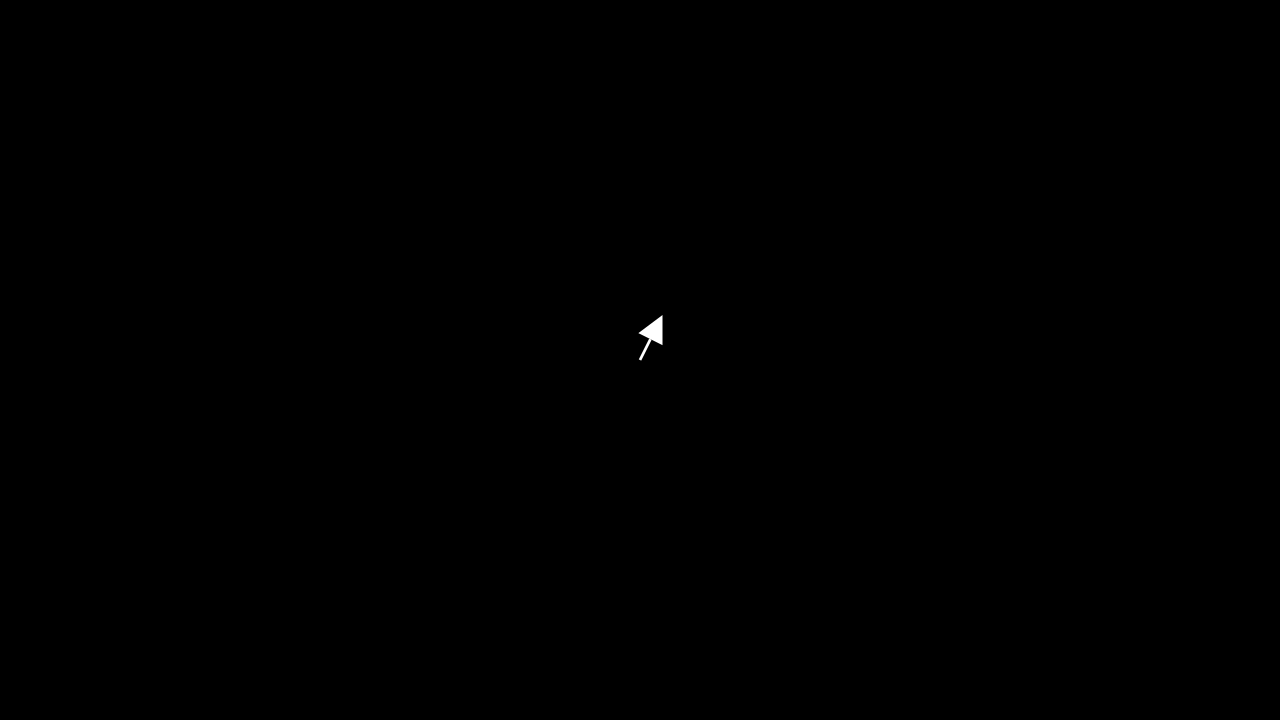

<ExecutionResult object at 27ca4e7a0d0, execution_count=None error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 27ca6821c50, raw_cell="%%manim -qm -v WARNING Scena
class Scena(Scene):
	.." store_history=False silent=False shell_futures=True cell_id=None> result=None>

In [ ]:
from manim import *
import numpy as np

def f(self: Scene):
    #self.wait(2)
    cursor = Arrow(
        start=ORIGIN,
        end=0.5*(UP + 0.5*RIGHT),
        buff=0,
        stroke_width=3,
        tip_length=0.3,
        max_tip_length_to_length_ratio=100,
        max_stroke_width_to_length_ratio=100,
        color=WHITE
    )
    self.add(cursor)

get_ipython().run_cell("%%manim -qm -v WARNING Scena\nclass Scena(Scene):\n\tdef construct(self):\n\t\tf(self)")

Manim Community v0.19.0

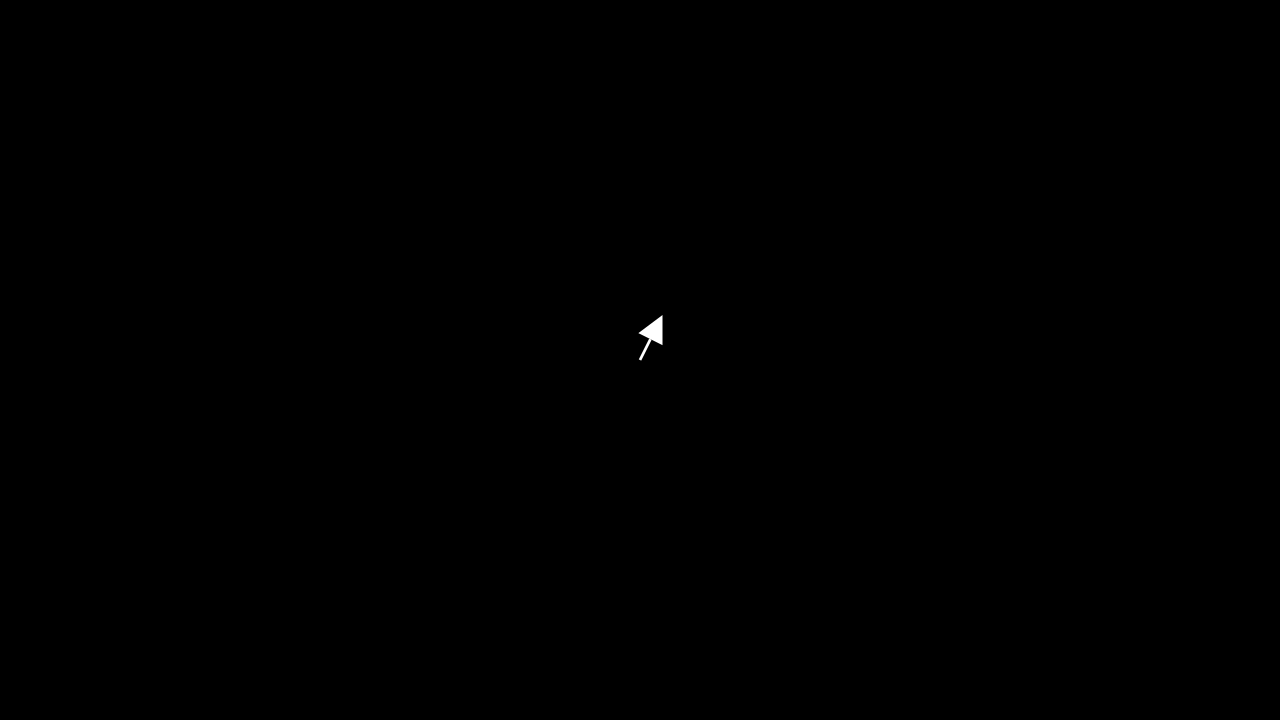

<ExecutionResult object at 27ca25b5ad0, execution_count=None error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 27ca4ed9d90, raw_cell="%%manim -qm -v WARNING Scenar
class Scenar(Scene):.." store_history=False silent=False shell_futures=True cell_id=None> result=None>

In [ ]:
from manim import *
import numpy as np

def f(self: Scene):
    #self.wait(2)&
    cursor = Arrow(
        start=ORIGIN,
        end=0.5*(UP + 0.5*RIGHT),
        buff=0,
        stroke_width=3,
        tip_length=0.3,
        max_tip_length_to_length_ratio=100,
        max_stroke_width_to_length_ratio=100,
        color=WHITE
    )
    self.add(cursor)

get_ipython().run_cell("%%manim -qm -v WARNING Scenar\nclass Scenar(Scene):\n\tdef construct(self):\n\t\tf(self)")

In [10]:
from manim import *
import numpy as np

def f(self: Scene):
    dot1 = Dot(ORIGIN, color=RED)
    dot2 = Dot(2*RIGHT, color=RED)
    self.play(
        Create(dot1),
        Create(dot2)
    )
    self.wait(1)
    line = always_redraw(lambda: Line(dot1.get_center(), dot2.get_center(), color=RED))
    self.play(
        Create(line)
    )
    self.wait(1)
    self.play(
        dot1.animate.shift(UP),
        dot2.animate.shift(RIGHT*2)
    )
    self.wait(1)


get_ipython().run_cell("%%manim -qh -v WARNING Sceni\nclass Sceni(Scene):\n\tdef construct(self):\n\t\tf(self)")

Manim Community v0.19.0

<ExecutionResult object at 2a0280b38d0, execution_count=None error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 2a02acbd610, raw_cell="%%manim -qh -v WARNING Sceni
class Sceni(Scene):
	.." store_history=False silent=False shell_futures=True cell_id=None> result=None>